In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_103319.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_114834.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_144654.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_144252.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_161439.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190420_200351.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190424_133939.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_131420.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190419_163046.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled/Hispa/IMG_20190424_133917_1.jpg
/kaggle/input/rice-diseases-image-dataset/LabelledRice/Lab

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 300

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/rice-diseases-image-dataset/LabelledRice/Labelled",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3355 files belonging to 4 classes.


2022-10-26 17:49:12.831811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:49:12.924438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:49:12.925229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 17:49:12.927959: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/train",
#     shuffle=True,
#     image_size = (IMAGE_SIZE, IMAGE_SIZE),
#     batch_size = BATCH_SIZE
# )

In [6]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/validation",
#     shuffle=True,
#     image_size = (IMAGE_SIZE, IMAGE_SIZE),
#     batch_size = BATCH_SIZE
# )

In [7]:
class_names = dataset.class_names
print(class_names)
print(len(dataset))

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']
105


2022-10-26 17:49:15.463379: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-26 17:49:25.621780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 216 of 256
2022-10-26 17:49:27.102971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


(32, 256, 256, 3)
[3 0 2 2 3 1 2 2 3 0 3 1 1 1 2 1 3 1 3 1 1 1 1 3 2 1 1 2 1 1 3 1]
first image
(256, 256, 3)


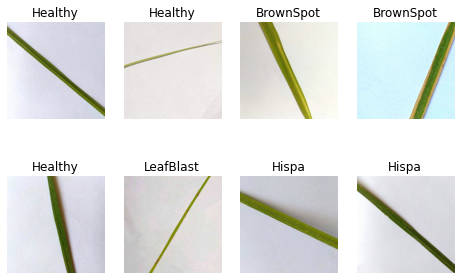

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print("first image")
    print(image_batch[0].shape)

# visualization
plt.figure(figsize=(8, 8))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")




In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

84
10
11


In [12]:
# runtime optimization
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
# image preprocessing

# rescaling
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [14]:
#data_augmentation

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [17]:
# model training

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(8, kernel_size = (3,3), activation='relu',padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(16,  kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(16,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'),
])

model.build(input_shape=input_shape)


In [18]:
# model.summary()

In [19]:
from tensorflow import keras
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
# model.summary()

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs= EPOCH,
)

Epoch 1/300


2022-10-26 17:49:51.223662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1 of 10000
2022-10-26 17:50:01.126872: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 8 of 10000
2022-10-26 17:50:11.780531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 16 of 10000
2022-10-26 17:50:21.873884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 23 of 10000
2022-10-26 17:50:31.240376: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 29 of 10000
2022-10-26 17:50:42.298531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 37 of 10000
2022-10-26 17:50:51.507101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buf

84/84 [==============================] - ETA: 0s - loss: 1.3379 - accuracy: 0.4394

2022-10-26 17:52:43.909306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 245 of 256
2022-10-26 17:52:44.315161: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-10-26 17:52:45.860076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1 of 10000
2022-10-26 17:52:55.234789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 8 of 10000
2022-10-26 17:53:04.570134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 15 of 10000
2022-10-26 17:53:14.204270: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 22 of 10000
2022-10-26 17:53:24.179885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 29 of 10000


84/84 [==============================] - 321s 2s/step - loss: 1.3379 - accuracy: 0.4394 - val_loss: 1.2994 - val_accuracy: 0.4500


2022-10-26 17:55:00.909896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-10-26 17:55:00.910642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1 of 1000
2022-10-26 17:55:00.910715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2 of 1000
2022-10-26 17:55:00.910749: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 3 of 1000
2022-10-26 17:55:00.910796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 4 of 1000
2022-10-26 17:55:00.910843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 5 of 1000
2022-10-26 17:55:00.910873: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 6 of 1000
2022-10-2

Epoch 2/300
84/84 [==============================] - 20s 243ms/step - loss: 1.2974 - accuracy: 0.4447 - val_loss: 1.2577 - val_accuracy: 0.4500
Epoch 3/300
84/84 [==============================] - 21s 247ms/step - loss: 1.2813 - accuracy: 0.4447 - val_loss: 1.2456 - val_accuracy: 0.4500
Epoch 4/300
84/84 [==============================] - 21s 244ms/step - loss: 1.2532 - accuracy: 0.4447 - val_loss: 1.1999 - val_accuracy: 0.4500
Epoch 5/300
84/84 [==============================] - 21s 248ms/step - loss: 1.2235 - accuracy: 0.4722 - val_loss: 1.2989 - val_accuracy: 0.4500
Epoch 6/300
84/84 [==============================] - 20s 241ms/step - loss: 1.2029 - accuracy: 0.4961 - val_loss: 1.1848 - val_accuracy: 0.5063
Epoch 7/300
84/84 [==============================] - 21s 245ms/step - loss: 1.1979 - accuracy: 0.4946 - val_loss: 1.2161 - val_accuracy: 0.4750
Epoch 8/300
84/84 [==============================] - 20s 242ms/step - loss: 1.2188 - accuracy: 0.4819 - val_loss: 1.2106 - val_accuracy:

In [46]:
score = model.evaluate(test_ds)
score

11/11 [==============================] - 0s 10ms/step - loss: 0.5612 - accuracy: 0.7926


[0.5612007975578308, 0.7926136255264282]

In [47]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f8b2f8db850>>

In [48]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 300, 'steps': 84}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

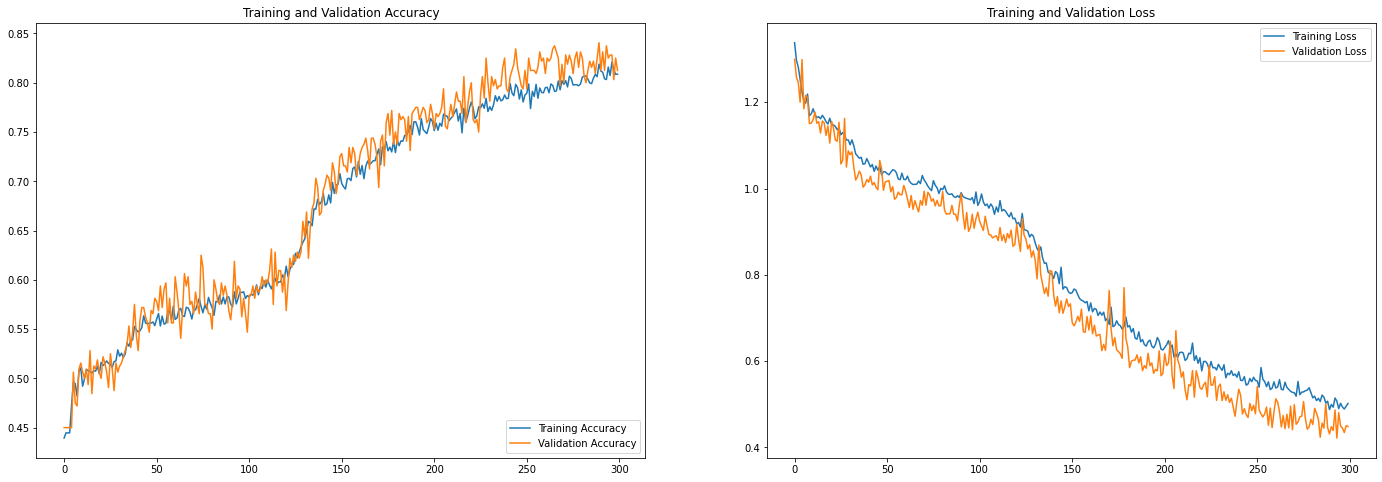

In [50]:
EPOCHS = EPOCH
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
# Write a function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

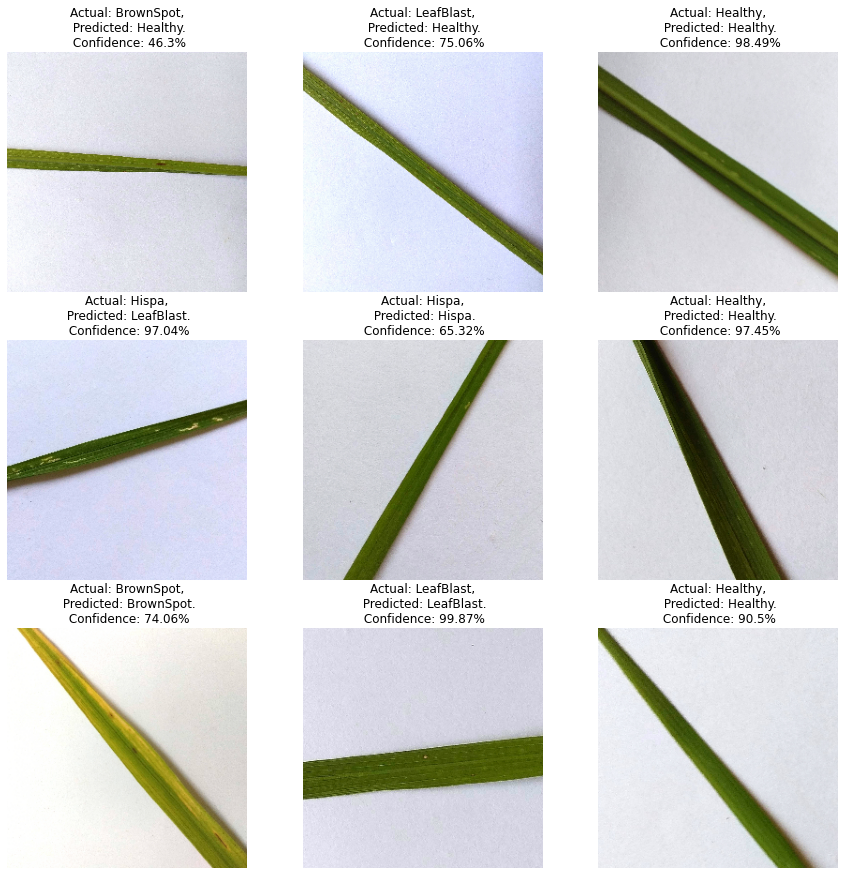

In [52]:
# Now run inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [53]:
predicted = []
actual = []
for j in range(1, 11):
    for images, labels in test_ds.take(j):
        for i in range(15):
            predicted_class, confidence = predict(model, images[i].numpy())
            predicted.append(predicted_class)
            actual_class = class_names[labels[i]] 
            actual.append(actual_class)

In [54]:
print(len(actual))
print(predicted)

825
['Healthy', 'LeafBlast', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'Hispa', 'Healthy', 'BrownSpot', 'Hispa', 'BrownSpot', 'Healthy', 'Healthy', 'LeafBlast', 'LeafBlast', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'BrownSpot', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'BrownSpot', 'Hispa', 'Healthy', 'Healthy', 'LeafBlast', 'LeafBlast', 'LeafBlast', 'BrownSpot', 'LeafBlast', 'Healthy', 'Healthy', 'LeafBlast', 'Healthy', 'Healthy', 'LeafBlast', 'Hispa', 'Healthy', 'Hispa', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'Hispa', 'LeafBlast', 'LeafBlast', 'BrownSpot', 'LeafBlast', 'LeafBlast', 'LeafBlast', 'LeafBlast', 'Hispa', 'BrownSpot', 'Healthy', 'Healthy', 'Healthy', 'Hispa', 'Healthy', 'LeafBlast', 'BrownSpot', 'Hispa', 'Healthy', 'Hispa', 'LeafBlast', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Hispa', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'BrownSpot', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'BrownSpot', 'Healthy', 'BrownS

<AxesSubplot:>

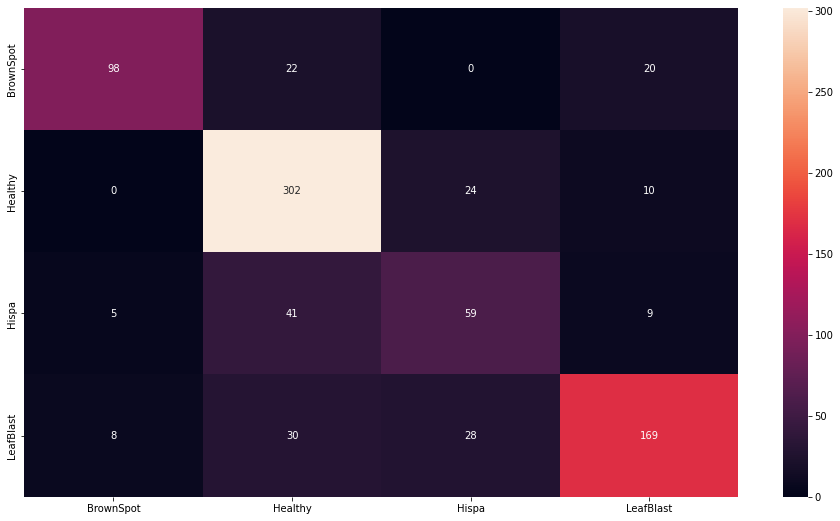

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (16,9))
cm = confusion_matrix(actual, predicted)

sns.heatmap(cm, 
            annot = True,
            fmt = 'd',
            xticklabels = class_names,
            yticklabels = class_names,
           )


In [56]:
from sklearn.metrics import classification_report
cr = classification_report(actual, 
                           predicted, 
                           target_names = class_names
                          )

In [57]:
print(cr)

              precision    recall  f1-score   support

   BrownSpot       0.88      0.70      0.78       140
     Healthy       0.76      0.90      0.83       336
       Hispa       0.53      0.52      0.52       114
   LeafBlast       0.81      0.72      0.76       235

    accuracy                           0.76       825
   macro avg       0.75      0.71      0.72       825
weighted avg       0.77      0.76      0.76       825

